In [0]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [0]:
roundsDf = pd.read_csv("/dbfs/FileStore/karbide/Rounds.txt")
holesDf = pd.read_csv("/dbfs/FileStore/karbide/Holes.txt")
holesDf.drop(["Score",	"ToPar", "Unnamed: 0"],axis=1,inplace = True)
roundsDf.drop(["Unnamed: 0"],axis=1,inplace = True)

In [0]:
roundsDf.head(10)

,RoundScore,RoundShots,DoubleEagles,Eagles,Birdies,Pars,Bogeys,DoubleBogeys,WorseThanDoubleBogeys,PlayerRoundID,RoundNum,PlayerID,TournamentID,counts
0,0,71,0,0,2,14,2,0,0,110313,1,40000129,403,352
1,-3,68,0,0,5,11,2,0,0,110458,2,40000129,403,352
2,0,71,0,0,5,9,3,1,0,110438,1,40000009,403,352
3,-1,70,0,0,6,7,5,0,0,110833,2,40000009,403,352
4,-2,69,0,0,6,8,4,0,0,110342,1,40000491,403,352
5,-3,68,0,0,6,10,1,1,0,110545,2,40000491,403,352
6,0,71,0,0,3,12,3,0,0,110408,1,40001173,403,352
7,-6,65,0,1,6,9,2,0,0,110743,2,40001173,403,352
8,-5,66,0,0,6,11,1,0,0,110431,1,40001425,403,352
9,-1,70,0,0,3,13,2,0,0,110812,2,40001425,403,352


In [0]:
print(roundsDf.shape)
print(roundsDf["PlayerID"].nunique())
print(roundsDf["TournamentID"].nunique())

(14770, 14)
192
49

In [0]:
holesDf.head(10)

,Birdie,Bogey,DoubleBogey,DoubleEagle,Eagle,HoleInOne,Hole_Score,Hole_ScoreNum,IsPar,Number,Par,PlayerRoundID,Player_ID,Round,Tournament_ID,WorseThanDoubleBogey
0,False,False,False,False,False,False,IsPar,0,True,10,4,110313,40000129,1,403,False
1,False,False,False,False,False,False,IsPar,0,True,11,4,110313,40000129,1,403,False
2,False,False,False,False,False,False,IsPar,0,True,12,4,110313,40000129,1,403,False
3,False,False,False,False,False,False,IsPar,0,True,13,5,110313,40000129,1,403,False
4,True,False,False,False,False,False,Birdie,-1,False,14,3,110313,40000129,1,403,False
5,False,False,False,False,False,False,IsPar,0,True,15,4,110313,40000129,1,403,False
6,False,True,False,False,False,False,Bogey,1,False,16,5,110313,40000129,1,403,False
7,False,False,False,False,False,False,IsPar,0,True,17,3,110313,40000129,1,403,False
8,False,False,False,False,False,False,IsPar,0,True,18,4,110313,40000129,1,403,False
9,False,False,False,False,False,False,IsPar,0,True,1,4,110313,40000129,1,403,False


In [0]:
print(holesDf.shape)
print(holesDf["Player_ID"].nunique())
print(holesDf["Tournament_ID"].nunique())

(262073, 16)
192
49

For our exploratory analysis, lets go one dataset at a time

**ROUNDS**

In [0]:
roundsDf["RoundScore"].describe()

Out[7]: count 14770.000000
mean -0.830603
std 3.421069
min -18.000000
25% -3.000000
50% -1.000000
75% 1.000000
max 16.000000
Name: RoundScore, dtype: float64

In [0]:
roundsDf.describe()
# I want to see the round where there were no Pars

,RoundScore,RoundShots,DoubleEagles,Eagles,Birdies,Pars,Bogeys,DoubleBogeys,WorseThanDoubleBogeys,PlayerRoundID,RoundNum,PlayerID,TournamentID,counts
count,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000,1.477000e+04,14770.000000,14770.000000
mean,-0.830603,69.443873,0.025457,0.138456,3.698443,11.024848,2.536222,0.275626,0.044550,119957.705146,2.244008,4.000105e+07,429.649763,318.614083
std,3.421069,8.822188,0.219632,0.451887,1.807270,2.550909,1.674411,0.540644,0.214683,6696.178178,1.088867,8.010788e+02,19.069276,62.216361
min,-18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108121.000000,1.000000,4.000000e+07,373.000000,108.000000
25%,-3.000000,68.000000,0.000000,0.000000,2.000000,10.000000,1.000000,0.000000,0.000000,114175.250000,1.000000,4.000050e+07,419.000000,276.000000
50%,-1.000000,70.000000,0.000000,0.000000,4.000000,11.000000,2.000000,0.000000,0.000000,120113.500000,2.000000,4.000095e+07,432.000000,338.000000
75%,1.000000,73.000000,0.000000,0.000000,5.000000,13.000000,4.000000,0.000000,0.000000,125737.750000,3.000000,4.000143e+07,444.000000,364.000000
max,16.000000,86.000000,3.000000,7.000000,12.000000,18.000000,10.000000,5.000000,3.000000,131261.000000,4.000000,4.000366e+07,461.000000,407.000000


In [0]:
roundsDf.loc[roundsDf["Pars"]==0]
#they are mostly from tournament 448, lets bring in the tournament names and find this one

,RoundScore,RoundShots,DoubleEagles,Eagles,Birdies,Pars,Bogeys,DoubleBogeys,WorseThanDoubleBogeys,PlayerRoundID,RoundNum,PlayerID,TournamentID,counts
1543,2,6,0,0,0,0,0,1,0,128573,2,40001038,446,350
9248,-8,6,2,1,0,0,0,0,0,129701,1,40001136,448,261
9250,-9,8,2,1,1,0,0,0,0,129703,3,40001136,448,261
9251,-4,4,1,0,1,0,0,0,0,129704,4,40001136,448,261
9252,-9,8,2,1,1,0,0,0,0,129705,1,40000218,448,261
9253,-8,6,2,1,0,0,0,0,0,129706,2,40000218,448,261
9254,-5,4,1,1,0,0,0,0,0,129707,3,40000218,448,261
9255,-8,13,2,1,1,0,1,0,0,129708,4,40000218,448,261
9256,-3,4,0,1,1,0,0,0,0,129785,1,40000491,448,261
9257,-8,6,2,1,0,0,0,0,0,129786,2,40000491,448,261


In [0]:
Tournaments = pd.read_csv("/dbfs/FileStore/karbide/Last_Season.txt")

In [0]:
Tournaments.loc[Tournaments["TournamentID"] == 429]

,Unnamed: 0,TournamentID,Name,StartDate,EndDate,IsOver,IsInProgress,Venue,Location,Par,Yards,Purse,StartDateTime,Canceled,Covered,City,State,ZipCode,Country,TimeZone,Format,SportRadarTournamentID,Rounds,New_Date
29,83,429,THE PLAYERS Championship,2021-03-11T00:00:00,2021-03-14T00:00:00,True,False,TPC Sawgrass,"Ponte Vedra Beach, FL",72.0,7189.0,15000000.0,2021-03-11T06:45:00,False,True,Ponte Vedra Beach,FL,NaN,USA,America/New York,Stroke,452f32b4-d349-4963-89be-208c018d7e04,"[{'TournamentID': 429, 'RoundID': 11635, 'Numb...",2021-03-11


In [0]:
# the Barracuda Championship uses an alternate scoring format than that of the rest of the tour so it is easiest just to remove it from our sets
roundsDf = roundsDf.loc[roundsDf["TournamentID"] != 448]
holesDf = holesDf.loc[holesDf["Tournament_ID"] != 448]

In [0]:
# lets also remove rounds where they were not completed 

roundsDf["Total_Holes"] = roundsDf["DoubleEagles"] + roundsDf["Eagles"] + roundsDf["Birdies"]+ roundsDf["Pars"]+ roundsDf["Bogeys"]+ roundsDf["DoubleBogeys"]+ roundsDf["WorseThanDoubleBogeys"]
roundsDf = roundsDf.loc[roundsDf["Total_Holes"] == 18]

In [0]:
#roundsDf.to_csv("/dbfs/FileStore/karbide/RoundsReg.txt")

In [0]:
roundsDf.describe()

,RoundScore,RoundShots,DoubleEagles,Eagles,Birdies,Pars,Bogeys,DoubleBogeys,WorseThanDoubleBogeys,PlayerRoundID,RoundNum,PlayerID,TournamentID,counts,Total_Holes
count,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,1.447800e+04,14478.000000,14478.000000,14478.0
mean,-0.689253,70.578602,0.000207,0.100912,3.760671,11.233941,2.579500,0.279942,0.044827,119779.247341,2.244854,4.000105e+07,429.306672,319.663973,18.0
std,3.222140,3.255105,0.014394,0.315338,1.767280,2.086885,1.653771,0.543500,0.215435,6628.425273,1.089520,8.014161e+02,19.080602,62.295923,0.0
min,-12.000000,60.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,108121.000000,1.000000,4.000000e+07,373.000000,108.000000,18.0
25%,-3.000000,68.000000,0.000000,0.000000,3.000000,10.000000,1.000000,0.000000,0.000000,114106.250000,1.000000,4.000050e+07,419.000000,276.000000,18.0
50%,-1.000000,70.000000,0.000000,0.000000,4.000000,11.000000,2.000000,0.000000,0.000000,119841.500000,2.000000,4.000095e+07,430.000000,340.000000,18.0
75%,1.000000,73.000000,0.000000,0.000000,5.000000,13.000000,4.000000,0.000000,0.000000,125402.750000,3.000000,4.000143e+07,444.000000,364.000000,18.0
max,16.000000,86.000000,1.000000,3.000000,12.000000,18.000000,10.000000,5.000000,3.000000,131261.000000,4.000000,4.000366e+07,461.000000,407.000000,18.0


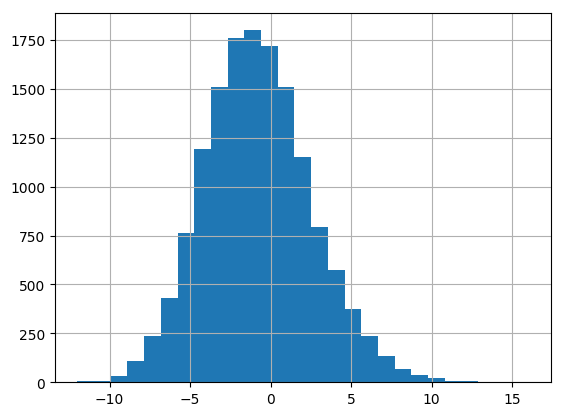

In [0]:
display(roundsDf["RoundScore"].hist(bins = 27))
#looks symetrical and normally distributed

In [0]:
Tournaments = pd.read_csv("/dbfs/FileStore/karbide/Last_Season.txt")
TournamentNames = Tournaments[["TournamentID","Name"]]


In [0]:
Players = pd.read_csv("/dbfs/FileStore/karbide/PlayerStats.txt")
PlayerNames = Players[["PlayerID","PLAYER NAME"]]

In [0]:
roundsDf = roundsDf.merge(PlayerNames, how = "left", left_on = "PlayerID", right_on = "PlayerID")

In [0]:
roundsDf = roundsDf.merge(TournamentNames, how = "left", on = "TournamentID")

In [0]:
# average round score by tournament
tournamentAverages = roundsDf.groupby("Name").agg({"RoundScore" : ['mean']})
tournamentAverages.reset_index(inplace = True)
tournamentAverages.columns = ["TournamentName","Mean"]
tournamentAverages.sort_values("Mean", inplace = True)

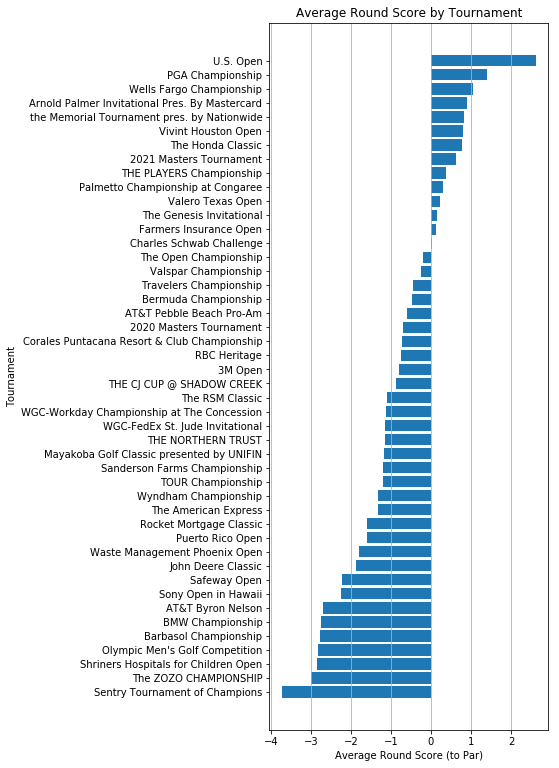

In [0]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 13))
ax.barh(tournamentAverages["TournamentName"],tournamentAverages["Mean"])

plt.autoscale(enable=True, axis='y', tight=False)
plt.xlabel("Average Round Score (to Par)")
plt.ylabel("Tournament")
plt.title("Average Round Score by Tournament")
plt.grid(axis='x')

display(fig)

In [0]:
PlayerAverages = roundsDf.groupby(["PLAYER NAME","PlayerID"]).agg({"RoundScore" : ['mean']})
PlayerAverages.reset_index(inplace = True)
PlayerAverages.columns = ["PlayerName","PlayerID","Mean"]
PlayerAverages.sort_values("Mean", inplace = True)

PlayerAveragesTop = PlayerAverages[0:10]
PlayerAveragesBottom = PlayerAverages[-10:]

PlayersChart = pd.concat([PlayerAveragesTop,PlayerAveragesBottom])
PlayersChart.sort_values("Mean", inplace = True, ascending = False)

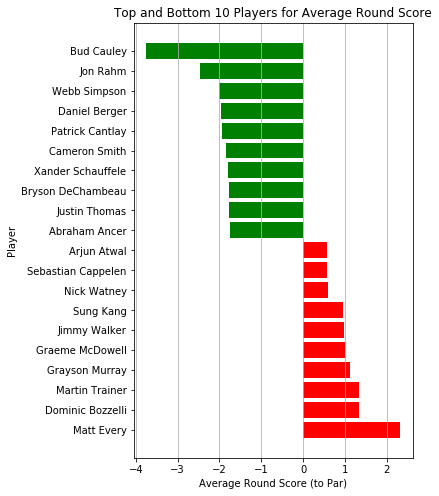

In [0]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(PlayersChart["PlayerName"],PlayersChart["Mean"], color = ["Red","Red","Red","Red","Red","Red","Red","Red","Red","Red","Green","Green","Green","Green","Green","Green","Green","Green","Green","Green"])

#Design
plt.autoscale(enable=True, axis='y', tight=False)
plt.xlabel("Average Round Score (to Par)")
plt.ylabel("Player")
plt.title("Top and Bottom 10 Players for Average Round Score")
plt.grid(axis='x')

display(fig)

Now lets looks at the Hole by Hole dataframe.
Barracuda Tournament has already been removed

There are also a few player statistics I want to calculate and store for later (Par3Average, Par4Average, Par5Average, HolesPerBirdie, HolesPerEagle)

In [0]:
holesDf.head(20)

,Birdie,Bogey,DoubleBogey,DoubleEagle,Eagle,HoleInOne,Hole_Score,Hole_ScoreNum,IsPar,Number,Par,PlayerRoundID,Player_ID,Round,Tournament_ID,WorseThanDoubleBogey
0,False,False,False,False,False,False,IsPar,0,True,10,4,110313,40000129,1,403,False
1,False,False,False,False,False,False,IsPar,0,True,11,4,110313,40000129,1,403,False
2,False,False,False,False,False,False,IsPar,0,True,12,4,110313,40000129,1,403,False
3,False,False,False,False,False,False,IsPar,0,True,13,5,110313,40000129,1,403,False
4,True,False,False,False,False,False,Birdie,-1,False,14,3,110313,40000129,1,403,False
5,False,False,False,False,False,False,IsPar,0,True,15,4,110313,40000129,1,403,False
6,False,True,False,False,False,False,Bogey,1,False,16,5,110313,40000129,1,403,False
7,False,False,False,False,False,False,IsPar,0,True,17,3,110313,40000129,1,403,False
8,False,False,False,False,False,False,IsPar,0,True,18,4,110313,40000129,1,403,False
9,False,False,False,False,False,False,IsPar,0,True,1,4,110313,40000129,1,403,False


In [0]:
holesDf.describe()

,Hole_ScoreNum,Number,Par,PlayerRoundID,Player_ID,Round,Tournament_ID
count,260934.000000,260934.000000,260934.000000,260934.000000,2.609340e+05,260934.000000,260934.000000
mean,-0.037784,9.498291,3.959338,119782.471721,4.000105e+07,2.244303,429.316685
std,0.677151,5.188180,0.638725,6627.704994,8.014464e+02,1.089066,19.078080
min,-3.000000,1.000000,3.000000,108121.000000,4.000000e+07,1.000000,373.000000
25%,0.000000,5.000000,4.000000,114108.000000,4.000049e+07,1.000000,419.000000
50%,0.000000,9.000000,4.000000,119848.000000,4.000095e+07,2.000000,430.000000
75%,0.000000,14.000000,4.000000,125405.000000,4.000143e+07,3.000000,444.000000
max,3.000000,18.000000,5.000000,131261.000000,4.000366e+07,4.000000,461.000000


In [0]:
sum(holesDf["HoleInOne"])
# 29 hole in ones

Out[27]: 29

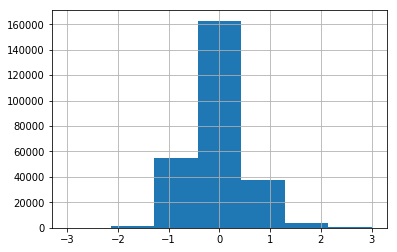

In [0]:
holesDf["Hole_ScoreNum"].hist(bins = 7)

In [0]:
holeNumberScores = holesDf.groupby("Number").agg({"Hole_ScoreNum" : ["mean"]})
holeNumberScores.reset_index(inplace = True)
holeNumberScores.columns = ["HoleNumber","Mean"]
holeNumberScores["Mean_adj"] = holeNumberScores["Mean"]*10
holeNumberScores.sort_values("HoleNumber",inplace = True)
holeNumberScores = holeNumberScores.astype({"HoleNumber": str})

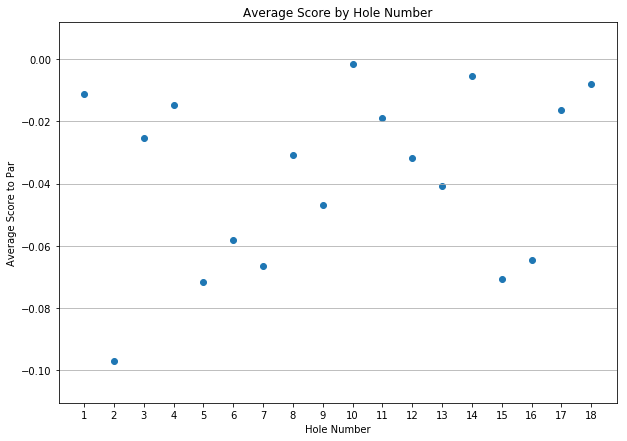

In [0]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(holeNumberScores["HoleNumber"], holeNumberScores['Mean'])

#Design
plt.autoscale(enable=True, axis='y', tight=False)
plt.ylabel("Average Score to Par")
plt.xlabel("Hole Number")
plt.title("Average Score by Hole Number")
plt.grid(axis='y')

display(fig)

In [0]:
holeParScores = holesDf.groupby("Par").agg({"Hole_ScoreNum" : ["mean"]})
holeParScores.reset_index(inplace = True)
holeParScores.columns = ["HolePar","Mean"]
holeParScores["Mean_adj"] = holeParScores["Mean"]*10
holeParScores.sort_values("HolePar",inplace = True)

xdist = holeParScores["HolePar"].tolist()

holeParScores = holeParScores.astype({"HolePar": str})

labels = holeParScores["Mean"].tolist()
lables = list(map(str, labels))



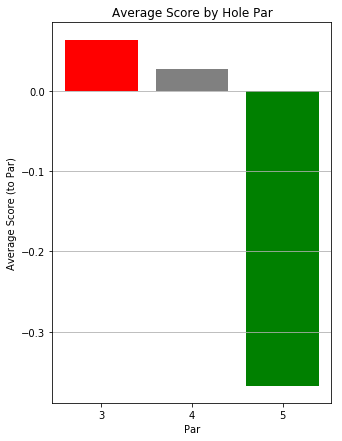

In [0]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 7))
ax.bar(holeParScores["HolePar"], holeParScores['Mean'], color = ["Red","Gray","Green"])

#Design
plt.autoscale(enable=True, axis='y', tight=False)
plt.ylabel("Average Score (to Par)")
plt.xlabel("Par")
plt.title("Average Score by Hole Par")
plt.grid(axis='y')
## Labels
#for i in range(len(labels)):
  #plt.text(x = xdist[i] - 3.5,y=holeParScores["Mean"][i] +0.01, s = lables[i], size = 6)

display(fig)

**DISTANCE MATRICIES**

I want to create distance matricies for both players and courses

The conclusions I hope to draw through this are: *Which courses play similarly*, *Which Players perform similarly*, *Which Players play similarly*

We will attack each of these questions one at a time

In [0]:
# Courses
# we are going to do 4 total distances. euclidean and cosine with both filling with zero and mean
CourseMatrix = roundsDf.groupby(["PlayerID","TournamentID"]).agg({"RoundShots": "sum"})
CourseMatrix.reset_index(inplace = True)
CourseMatrix = CourseMatrix.pivot(columns="TournamentID",index = "PlayerID",values="RoundShots").fillna(0)
CoursesList = CourseMatrix.columns

In [0]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
dist = pd.DataFrame(euclidean_distances(CourseMatrix.transpose()))
dist.columns = CoursesList
dist.index = CoursesList

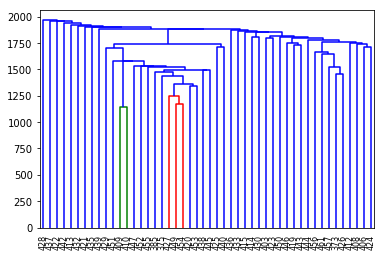

In [0]:
z = linkage(CourseMatrix.transpose(), metric = 'euclidean')
dendrogram(z, leaf_rotation = 90, color_threshold = 1250, labels= dist.index)
plt.show()

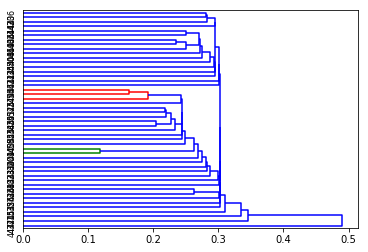

In [0]:
z = linkage(CourseMatrix.transpose(), metric = 'cosine')
dendrogram(z, leaf_rotation = 90, color_threshold = 0.2, labels= dist.index, orientation = 'right')
plt.show()

In [0]:
# now lets try will fill 
CourseMatrixMean = roundsDf.groupby(["PlayerID","TournamentID"]).agg({"RoundShots": "sum"})
CourseMatrixMean.reset_index(inplace = True)
CourseMatrixMean = CourseMatrixMean.pivot(columns="TournamentID",index = "PlayerID",values="RoundShots")
CourseMatrixMean.fillna(CourseMatrixMean.mean(), inplace = True)

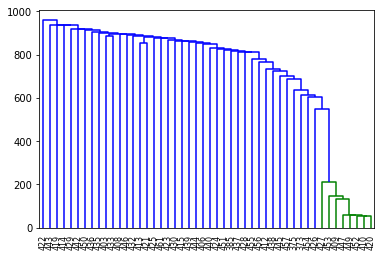

In [0]:
z = linkage(CourseMatrixMean.transpose(), metric = 'euclidean')
dendrogram(z, leaf_rotation = 90, color_threshold = 300, labels= dist.index)
plt.show()

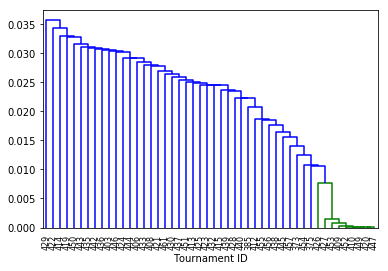

In [0]:
z = linkage(CourseMatrixMean.transpose(), metric = 'cosine')

plt.figure()
dendrogram(z, leaf_rotation = 90, color_threshold = 0.01, labels= dist.index)
plt.xlabel("Tournament ID")
plt.show()

In [0]:
SimilarTournaments = Tournaments.loc[(Tournaments["TournamentID"] == 452) | (Tournaments["TournamentID"] == 410 )| (Tournaments["TournamentID"] == 420 )| (Tournaments["TournamentID"] == 447)]
SimilarTournaments["Name"]

# the 4 tournaments that are grouped the closest together are   BMW Championship, Olympic Men's Golf Competition, Sentry Tournament of Champions, The ZOZO CHAMPIONSHIP

Out[41]: 1 BMW Championship
6 Olympic Men's Golf Competition
39 Sentry Tournament of Champions
47 The ZOZO CHAMPIONSHIP
Name: Name, dtype: object

In [0]:
playerCounts = roundsDf.groupby("TournamentID").agg({"PlayerID":"nunique"})
#playerCounts
playerCounts.head()

,PlayerID
TournamentID,
373,67
375,66
385,82
403,118
406,115


In [0]:
# Its grouping together those tournaments that dont have cuts. Hense the values are all closer and they are being compared as matching tournaments. Lets try and remove players that missed the cut

CourseMatrixCuts = roundsDf.groupby(["PlayerID","TournamentID"]).agg({"RoundShots": "sum"})
CourseMatrixCuts.reset_index(inplace = True)
CourseMatrixCuts = CourseMatrixCuts.loc[CourseMatrixCuts["RoundShots"] >= 230]

CourseMatrixCuts = CourseMatrixCuts.pivot(columns="TournamentID",index = "PlayerID",values="RoundShots")
CourseMatrixCuts.fillna(CourseMatrixCuts.mean(), inplace = True)

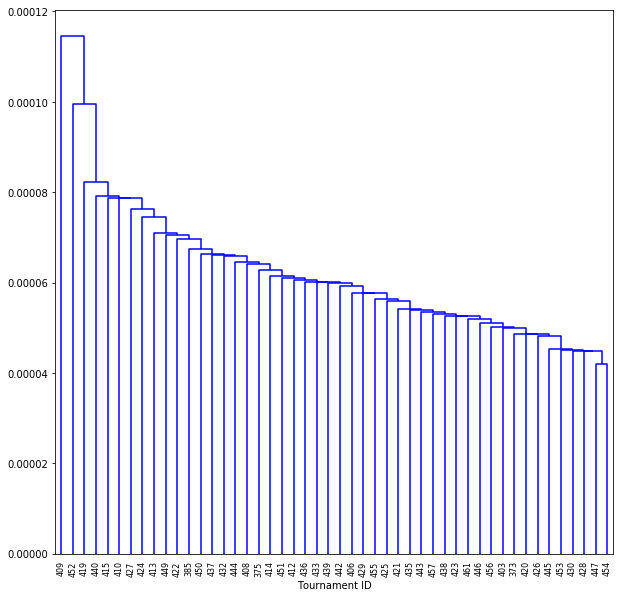

In [0]:
z = linkage(CourseMatrixCuts.transpose(), metric = 'cosine')

plt.figure(figsize = [10,10])
dendrogram(z, leaf_rotation = 90, color_threshold = 0.00004, labels= dist.index)
plt.xlabel("Tournament ID")
plt.show()

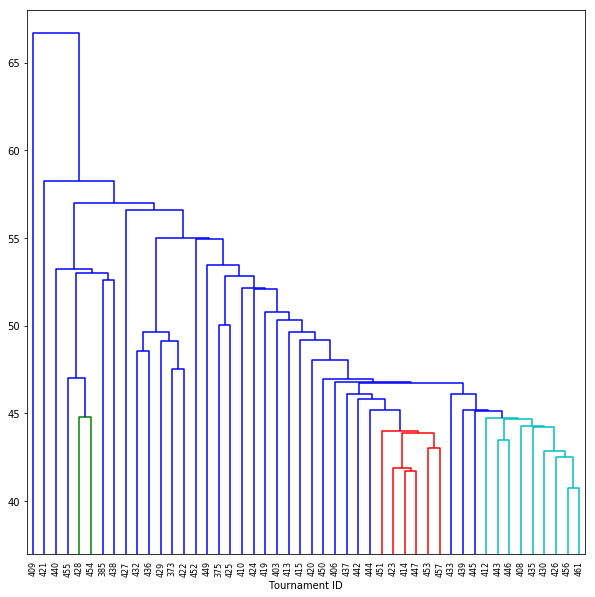

In [0]:
z = linkage(CourseMatrixCuts.transpose(), metric = 'euclidean')

plt.figure(figsize = [10,10])
#dendrogram(z, leaf_rotation = 90, color_threshold = 50, labels= dist.index)
dendrogram(z, leaf_rotation = 90, color_threshold = 45, labels= dist.index)
plt.xlabel("Tournament ID")
plt.ylim(37,68)
plt.show()

#now we get some real groups

In [0]:
# Player performance

PlayerPMatrix = roundsDf.groupby(["PLAYER NAME","TournamentID"]).agg({"RoundShots": "sum"})
PlayerPMatrix.reset_index(inplace = True)
PlayerPMatrix = PlayerPMatrix.loc[PlayerPMatrix["RoundShots"] >= 230]

PlayerPMatrix = PlayerPMatrix.pivot(columns="PLAYER NAME",index = "TournamentID",values="RoundShots")
PlayerPMatrix.fillna(PlayerPMatrix.mean(), inplace = True)

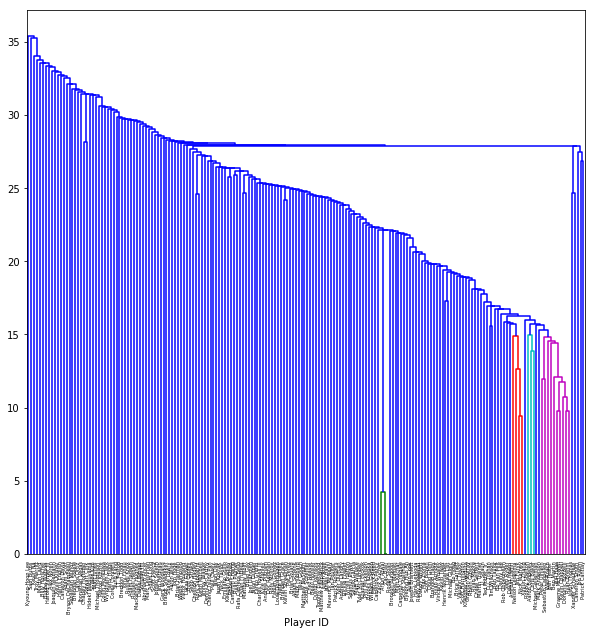

In [0]:
#I split this into 3 to highlight the close relationships
pLabels = PlayerPMatrix.columns
z = linkage(PlayerPMatrix.transpose(), metric = 'euclidean')

plt.figure(figsize = [10,10])
#dendrogram(z, leaf_rotation = 90, color_threshold = 50, labels= dist.index)
dendrogram(z, leaf_rotation = 90, color_threshold = 15, labels= pLabels)
plt.xlabel("Player ID")
#plt.ylim(8, 17.)
#plt.xlim(1650,1850)
plt.show()

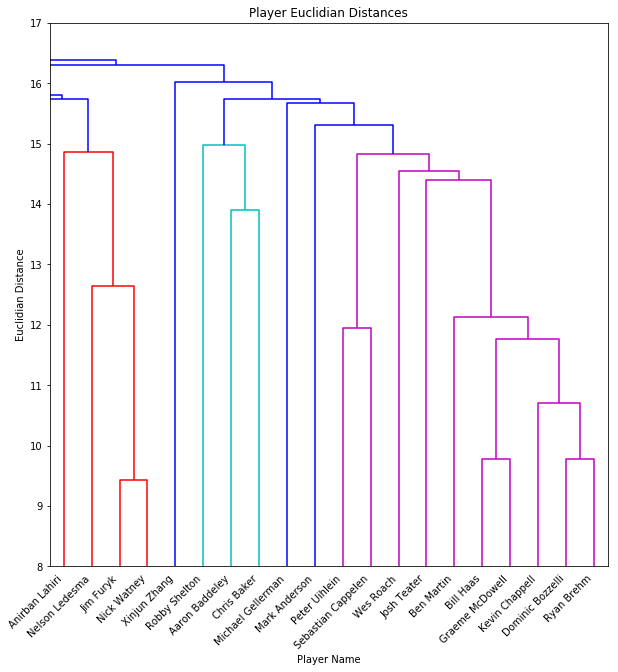

In [0]:
pLabels = PlayerPMatrix.columns
z = linkage(PlayerPMatrix.transpose(), metric = 'euclidean')

plt.figure(figsize = [10,10])
#dendrogram(z, leaf_rotation = 90, color_threshold = 50, labels= dist.index)
dendrogram(z, leaf_rotation = 90, color_threshold = 15, labels= pLabels)
plt.xlabel("Player Name")
plt.ylabel("Euclidian Distance")
plt.title("Player Euclidian Distances")
plt.ylim(8, 17.)
plt.xlim(1650,1850)
plt.xticks(fontsize = 10, rotation = 45, ha = "right")
plt.show()

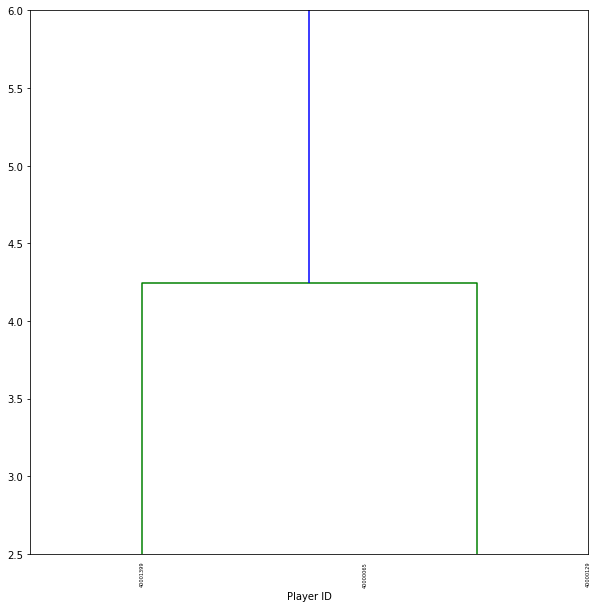

In [0]:
plt.figure(figsize = [10,10])
#dendrogram(z, leaf_rotation = 90, color_threshold = 50, labels= dist.index)
dendrogram(z, leaf_rotation = 90, color_threshold = 15, labels= pLabels)
plt.xlabel("Player ID")
plt.ylim(2.5, 6)
plt.xlim(1200,1225)
plt.show()

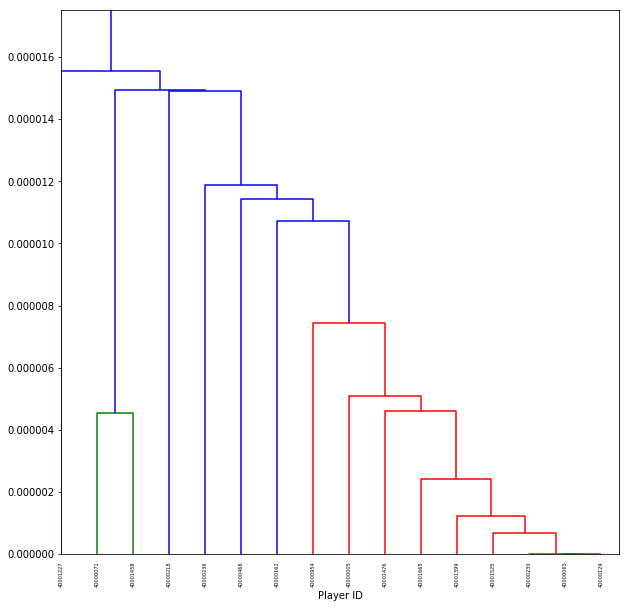

In [0]:
pLabels = PlayerPMatrix.columns
z = linkage(PlayerPMatrix.transpose(), metric = 'cosine')

plt.figure(figsize = [10,10])
#dendrogram(z, leaf_rotation = 90, color_threshold = 50, labels= dist.index)
dendrogram(z, leaf_rotation = 90, color_threshold = 0.00001, labels= pLabels)
plt.xlabel("Player ID")
plt.ylim(0, 0.0000175)
plt.xlim(1675,1830)
plt.show()

In [0]:
# Player Statistics
playerStats = pd.read_csv("/dbfs/FileStore/karbide/PlayerStats.txt")
playerStats.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [0]:
playerStats.columns

Out[52]: Index(['PLAYER NAME', 'GIR_PCT_FAIRWAY_BUNKER', 'GIR_PCT_FAIRWAY',
 'GIR_PCT_OVERALL', 'GIR_PCT_OVER_100', 'GIR_PCT_OVER_200',
 'GIR_PCT_UNDER_100', 'GREEN_PCT_SCRAMBLE_SAND',
 'GREEN_PCT_SCRAMBLE_ROUGH', 'FINISHES_TOP10', 'TEE_AVG_BALL_SPEED',
 'TEE_AVG_DRIVING_DISTANCE', 'TEE_DRIVING_ACCURACY_PCT',
 'TEE_AVG_LAUNCH_ANGLE', 'TEE_AVG_LEFT_ROUGH_TENDENCY_PCT',
 'TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT', 'TEE_AVG_SPIN_RATE',
 'PUTTING_AVG_ONE_PUTTS', 'PUTTING_AVG_TWO_PUTTS',
 'PUTTING_AVG_DIST_BIRDIE', 'PUTTING_AVG_PUTTS',
 'PUTTING_AVG_DIST_BIRDIE_INCH', 'PlayerID'],
 dtype='object')

In [0]:
playerStats.describe()

,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,PlayerID
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,1.920000e+02
mean,49.725521,78.109271,66.972969,62.665208,46.297448,85.200990,50.410052,56.869375,2.072917,170.845833,297.241146,60.383906,10.351927,14.298802,15.462187,2539.547396,7.064219,10.185625,29.006875,115.661458,4.000103e+07
std,9.118110,2.875223,2.658294,3.320420,6.023514,3.157528,7.707631,5.399575,2.105812,5.884950,8.210702,5.183916,1.488166,2.874431,2.845917,192.696924,0.429098,0.392178,0.510110,9.959866,8.000813e+02
min,29.000000,64.310000,52.050000,44.350000,28.400000,73.810000,26.090000,44.440000,0.000000,157.980000,277.900000,46.810000,5.960000,7.490000,8.860000,2070.900000,5.740000,9.230000,27.880000,95.000000,4.000000e+07
25%,43.125000,76.537500,65.207500,60.450000,42.462500,82.870000,45.517500,53.355000,1.000000,166.920000,291.650000,57.137500,9.227500,12.270000,13.495000,2416.175000,6.790000,9.910000,28.645000,109.000000,4.000046e+07
50%,50.000000,78.315000,66.960000,62.495000,46.720000,85.625000,50.000000,56.895000,1.000000,170.425000,297.350000,60.325000,10.545000,14.115000,15.335000,2528.950000,7.080000,10.170000,28.955000,115.000000,4.000095e+07
75%,55.675000,80.052500,68.765000,64.852500,49.575000,87.210000,55.560000,59.887500,3.000000,174.465000,301.925000,63.770000,11.480000,16.115000,17.265000,2661.325000,7.370000,10.410000,29.350000,121.000000,4.000144e+07
max,72.700000,85.330000,74.220000,71.270000,64.410000,92.310000,67.690000,74.650000,10.000000,189.180000,322.100000,74.500000,13.910000,22.680000,24.020000,3088.700000,8.170000,11.540000,30.280000,146.000000,4.000366e+07


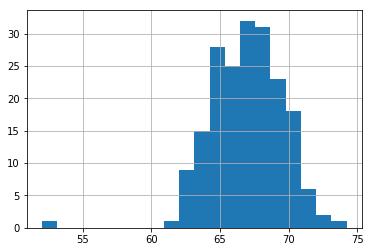

In [0]:
# Im going to create 2 visuals for each stat category
# Greens in Regulation

playerStats["GIR_PCT_OVERALL"].hist(bins = 20)

In [0]:
playerStatsBunker = playerStats[["PLAYER NAME", "GIR_PCT_FAIRWAY_BUNKER"]]
playerStatsBunker.sort_values(["GIR_PCT_FAIRWAY_BUNKER"], inplace = True)
playerStatsBunkerTop = playerStatsBunker[0:10]
playerStatsBunkerBottom = playerStatsBunker[-10:]

playerStatsBunker = pd.concat([playerStatsBunkerTop,playerStatsBunkerBottom])

/local_disk0/tmp/1638734934768-0/PythonShell.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import print_function

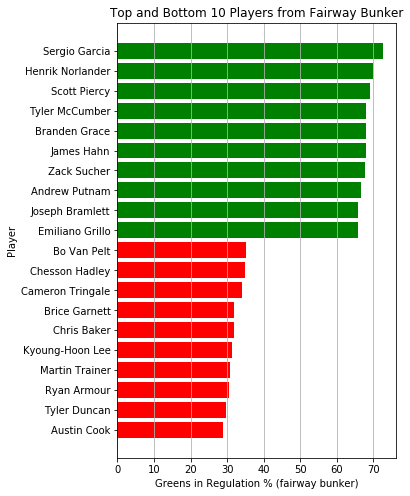

In [0]:
#best and worst performers out of the bunker

%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(playerStatsBunker["PLAYER NAME"],playerStatsBunker["GIR_PCT_FAIRWAY_BUNKER"], color = ["Red","Red","Red","Red","Red","Red","Red","Red","Red","Red","Green","Green","Green","Green","Green","Green","Green","Green","Green","Green"])

#Design
plt.autoscale(enable=True, axis='y', tight=False)
plt.xlabel("Greens in Regulation % (fairway bunker)")
plt.ylabel("Player")
plt.title("Top and Bottom 10 Players from Fairway Bunker")
plt.grid(axis='x')

display(fig)

In [0]:
import seaborn as sns

GIRSTATS = playerStats[['GIR_PCT_FAIRWAY_BUNKER', 'GIR_PCT_FAIRWAY',
       'GIR_PCT_OVERALL', 'GIR_PCT_OVER_100', 'GIR_PCT_OVER_200',
       'GIR_PCT_UNDER_100', 'GREEN_PCT_SCRAMBLE_SAND',
       'GREEN_PCT_SCRAMBLE_ROUGH']]

GIRcorr = GIRSTATS.corr()
GIRcorr

,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH
GIR_PCT_FAIRWAY_BUNKER,1.000000,0.130751,0.210088,0.206940,0.050705,0.043051,0.002167,-0.011181
GIR_PCT_FAIRWAY,0.130751,1.000000,0.738634,0.615876,0.354987,0.349197,0.054244,-0.005735
GIR_PCT_OVERALL,0.210088,0.738634,1.000000,0.921949,0.556693,0.464413,0.000750,0.018442
GIR_PCT_OVER_100,0.206940,0.615876,0.921949,1.000000,0.612086,0.403952,0.035728,0.049950
GIR_PCT_OVER_200,0.050705,0.354987,0.556693,0.612086,1.000000,0.228928,0.026275,-0.090054
GIR_PCT_UNDER_100,0.043051,0.349197,0.464413,0.403952,0.228928,1.000000,0.010951,-0.102194
GREEN_PCT_SCRAMBLE_SAND,0.002167,0.054244,0.000750,0.035728,0.026275,0.010951,1.000000,0.099648
GREEN_PCT_SCRAMBLE_ROUGH,-0.011181,-0.005735,0.018442,0.049950,-0.090054,-0.102194,0.099648,1.000000


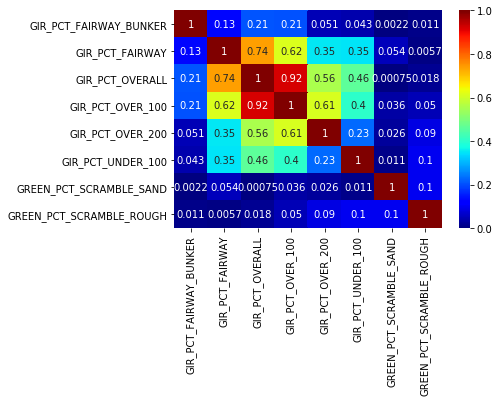

In [0]:
sns.heatmap(abs(GIRcorr),
           xticklabels = GIRcorr.columns,
           yticklabels = GIRcorr.columns,
           annot = True,
           cmap = "jet")

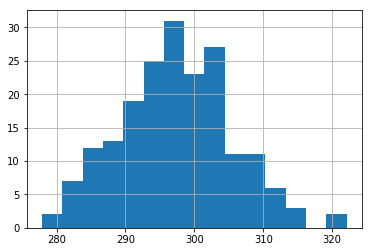

In [0]:
# Tee Shots
playerStats["TEE_AVG_DRIVING_DISTANCE"].hist(bins = 15)

In [0]:
playerStatsTee = playerStats[["PLAYER NAME", "TEE_AVG_BALL_SPEED"]]
playerStatsTee.sort_values(["TEE_AVG_BALL_SPEED"], inplace = True)
playerStatsTeeTop = playerStatsTee[0:10]
playerStatsTeeBottom = playerStatsTee[-10:]

playerStatsTee = pd.concat([playerStatsTeeTop,playerStatsTeeBottom])


/local_disk0/tmp/1638734934768-0/PythonShell.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import print_function

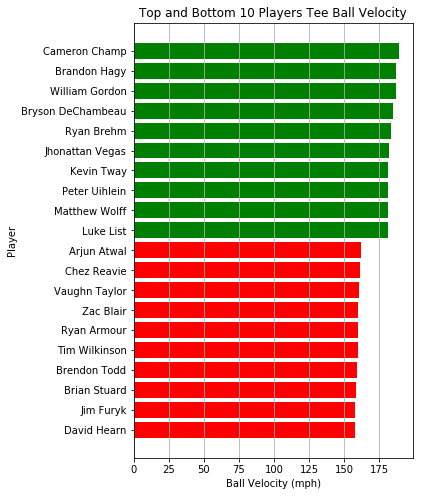

In [0]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(playerStatsTee["PLAYER NAME"],playerStatsTee["TEE_AVG_BALL_SPEED"], color = ["Red","Red","Red","Red","Red","Red","Red","Red","Red","Red","Green","Green","Green","Green","Green","Green","Green","Green","Green","Green"])

#Design
plt.autoscale(enable=True, axis='y', tight=False)
plt.xlabel("Ball Velocity (mph)")
plt.ylabel("Player")
plt.title("Top and Bottom 10 Players Tee Ball Velocity")
plt.grid(axis='x')

display(fig)

In [0]:
# Are the tee off stats coorelated

playerTeeStats = playerStats[['TEE_AVG_BALL_SPEED',
       'TEE_AVG_DRIVING_DISTANCE', 'TEE_DRIVING_ACCURACY_PCT',
       'TEE_AVG_LAUNCH_ANGLE', 'TEE_AVG_LEFT_ROUGH_TENDENCY_PCT',
       'TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT', 'TEE_AVG_SPIN_RATE']]

In [0]:
Teecorr = playerTeeStats.corr()
abs(Teecorr)

,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE
TEE_AVG_BALL_SPEED,1.000000,0.898241,0.629110,0.440623,0.493888,0.364494,0.226335
TEE_AVG_DRIVING_DISTANCE,0.898241,1.000000,0.570503,0.183068,0.465478,0.312705,0.030457
TEE_DRIVING_ACCURACY_PCT,0.629110,0.570503,1.000000,0.171694,0.656062,0.662935,0.078444
TEE_AVG_LAUNCH_ANGLE,0.440623,0.183068,0.171694,1.000000,0.103981,0.186982,0.509980
TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,0.493888,0.465478,0.656062,0.103981,1.000000,0.015057,0.049549
TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,0.364494,0.312705,0.662935,0.186982,0.015057,1.000000,0.172327
TEE_AVG_SPIN_RATE,0.226335,0.030457,0.078444,0.509980,0.049549,0.172327,1.000000


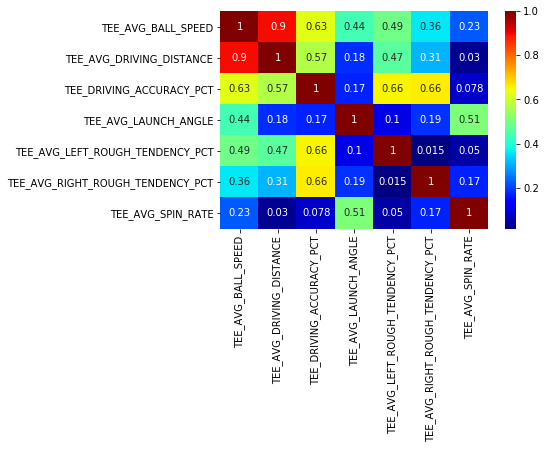

In [0]:
sns.heatmap(abs(Teecorr),
           xticklabels = Teecorr.columns,
           yticklabels = Teecorr.columns,
           annot = True,
           cmap = "jet")

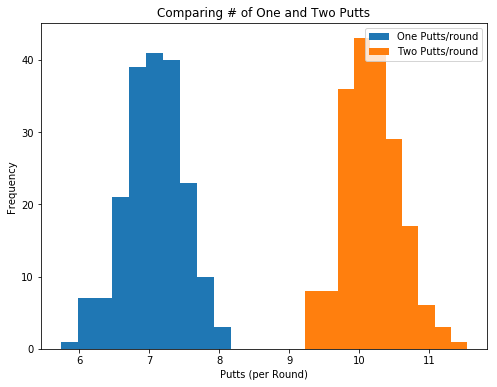

In [0]:
# Putting

plt.figure(figsize = (8,6))
plt.hist(playerStats["PUTTING_AVG_ONE_PUTTS"], label = "One Putts/round")
plt.hist(playerStats["PUTTING_AVG_TWO_PUTTS"], label = "Two Putts/round")

plt.xlabel("Putts (per Round)")
plt.ylabel("Frequency")
plt.title("Comparing # of One and Two Putts")
plt.legend(loc = "upper right")

In [0]:
playerStatsPutt = playerStats[["PLAYER NAME", "PUTTING_AVG_PUTTS"]]
playerStatsPutt.sort_values(["PUTTING_AVG_PUTTS"], inplace = True)
playerStatsPuttTop = playerStatsPutt[0:10]
playerStatsPuttBottom = playerStatsPutt[-10:]

playerStatsPutt = pd.concat([playerStatsPuttTop,playerStatsPuttBottom])


/local_disk0/tmp/1638734934768-0/PythonShell.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import print_function

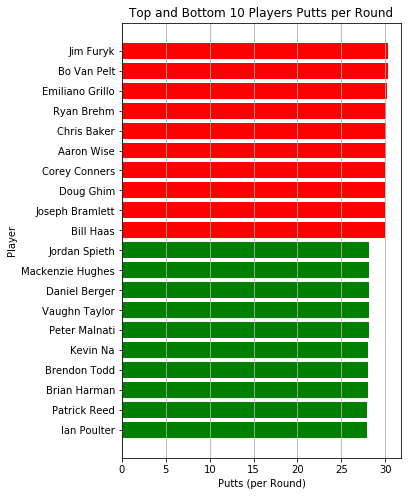

In [0]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(playerStatsPutt["PLAYER NAME"],playerStatsPutt["PUTTING_AVG_PUTTS"], color = ["Green","Green","Green","Green","Green","Green","Green","Green","Green","Green","Red","Red","Red","Red","Red","Red","Red","Red","Red","Red"])

#Design
plt.autoscale(enable=True, axis='y', tight=False)
plt.xlabel("Putts (per Round)")
plt.ylabel("Player")
plt.title("Top and Bottom 10 Players Putts per Round")
plt.grid(axis='x')

display(fig)

In [0]:
playerPuttStats = playerStats[[ 'PUTTING_AVG_ONE_PUTTS', 'PUTTING_AVG_TWO_PUTTS', 'PUTTING_AVG_PUTTS',
       'PUTTING_AVG_DIST_BIRDIE_INCH']]

In [0]:
Puttcorr = playerPuttStats.corr()
abs(Puttcorr)

,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH
PUTTING_AVG_ONE_PUTTS,1.000000,0.928652,0.944405,0.094200
PUTTING_AVG_TWO_PUTTS,0.928652,1.000000,0.841031,0.090723
PUTTING_AVG_PUTTS,0.944405,0.841031,1.000000,0.106753
PUTTING_AVG_DIST_BIRDIE_INCH,0.094200,0.090723,0.106753,1.000000


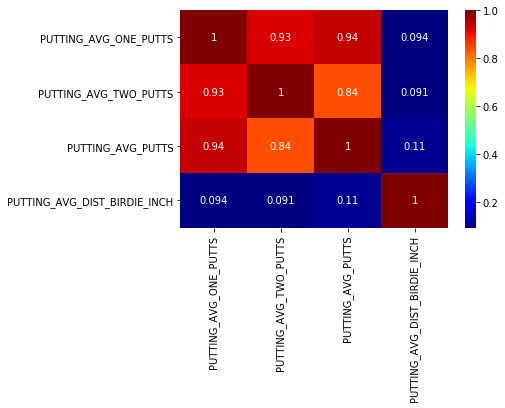

In [0]:
sns.heatmap(abs(Puttcorr),
           xticklabels = Puttcorr.columns,
           yticklabels = Puttcorr.columns,
           annot = True,
           cmap = "jet")

# Make my own stats!

**I want to make 5 stats using the hole dataframe:**

*Average Par 3,4,and 5 Scores, Holes/Birdie, and Holes/Bogey*

In [0]:
#Average scores
AverageScores = holesDf.groupby(["Player_ID","Par"]).agg({"Hole_ScoreNum" : "mean"})
AverageScores.reset_index(inplace = True)
AverageScorePar3 = AverageScores.loc[AverageScores["Par"] == 3]
AverageScorePar4 = AverageScores.loc[AverageScores["Par"] == 4]
AverageScorePar5 = AverageScores.loc[AverageScores["Par"] == 5]

AverageScorePar3.columns = ["PlayerID","Par","Par3Average"]
AverageScorePar4.columns = ["PlayerID","Par","Par4Average"]
AverageScorePar5.columns = ["PlayerID","Par","Par5Average"]

AverageScorePar3.drop(["Par"], axis = 1, inplace = True)
AverageScorePar4.drop(["Par"], axis = 1, inplace = True)
AverageScorePar5.drop(["Par"], axis = 1, inplace = True)

/databricks/python/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 errors=errors)

In [0]:
playerStats = playerStats.merge(AverageScorePar3, how = "left", on = "PlayerID")
playerStats = playerStats.merge(AverageScorePar4, how = "left", on = "PlayerID")
playerStats = playerStats.merge(AverageScorePar5, how = "left", on = "PlayerID")

In [0]:
def holesPerResult(data,result):
  results = data.groupby("Player_ID").agg({result: ["sum", 'count']})
  results.reset_index(inplace = True)
  results.columns = ["PlayerID","Sum","Total"]
  results[f"HolesPer{result}"] = results["Total"] / results["Sum"]
  
  results.drop(["Sum","Total"], axis = 1, inplace = True)
  return(results)

In [0]:
h_birdie = holesPerResult(holesDf,"Birdie")
h_bogey = holesPerResult(holesDf,"Bogey")

In [0]:
playerStats = playerStats.merge(h_birdie, how = "left", on = "PlayerID")
playerStats = playerStats.merge(h_bogey, how = "left", on = "PlayerID")

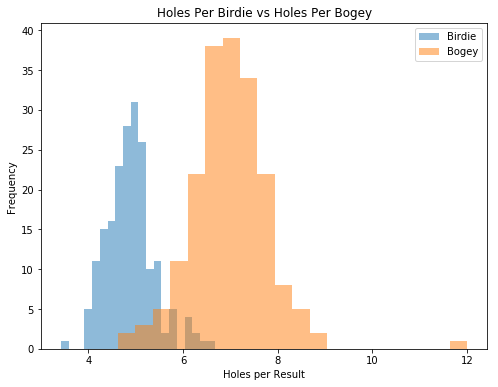

In [0]:

plt.figure(figsize = (8,6))
plt.hist(playerStats["HolesPerBirdie"], alpha = 0.5, label = "Birdie", bins = 20)
plt.hist(playerStats["HolesPerBogey"], alpha = 0.5, label = "Bogey", bins = 20)

plt.xlabel("Holes per Result")
plt.ylabel("Frequency")
plt.title("Holes Per Birdie vs Holes Per Bogey")
plt.legend(loc = "upper right")

In [0]:
resultStats = playerStats[["Par3Average","Par4Average","Par5Average","HolesPerBirdie","HolesPerBogey"]]

In [0]:
Resultscorr = resultStats.corr()
abs(Resultscorr)

,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey
Par3Average,1.000000,0.448338,0.423245,0.597250,0.546806
Par4Average,0.448338,1.000000,0.526658,0.644745,0.775681
Par5Average,0.423245,0.526658,1.000000,0.746317,0.603459
HolesPerBirdie,0.597250,0.644745,0.746317,1.000000,0.473436
HolesPerBogey,0.546806,0.775681,0.603459,0.473436,1.000000


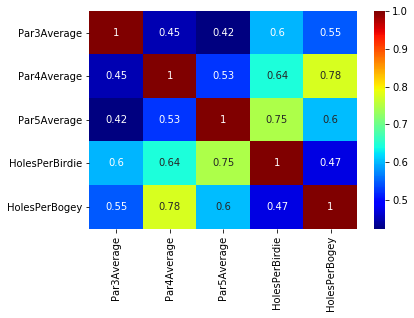

In [0]:
sns.heatmap(abs(Resultscorr),
           xticklabels = Resultscorr.columns,
           yticklabels = Resultscorr.columns,
           annot = True,
           cmap = "jet")

In [0]:
#playerStats.to_csv("/dbfs/FileStore/karbide/PlayerStatsComplete.txt")

In [0]:
playerStats.columns

Out[81]: Index(['PLAYER NAME', 'GIR_PCT_FAIRWAY_BUNKER', 'GIR_PCT_FAIRWAY',
 'GIR_PCT_OVERALL', 'GIR_PCT_OVER_100', 'GIR_PCT_OVER_200',
 'GIR_PCT_UNDER_100', 'GREEN_PCT_SCRAMBLE_SAND',
 'GREEN_PCT_SCRAMBLE_ROUGH', 'FINISHES_TOP10', 'TEE_AVG_BALL_SPEED',
 'TEE_AVG_DRIVING_DISTANCE', 'TEE_DRIVING_ACCURACY_PCT',
 'TEE_AVG_LAUNCH_ANGLE', 'TEE_AVG_LEFT_ROUGH_TENDENCY_PCT',
 'TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT', 'TEE_AVG_SPIN_RATE',
 'PUTTING_AVG_ONE_PUTTS', 'PUTTING_AVG_TWO_PUTTS',
 'PUTTING_AVG_DIST_BIRDIE', 'PUTTING_AVG_PUTTS',
 'PUTTING_AVG_DIST_BIRDIE_INCH', 'PlayerID', 'Par3Average',
 'Par4Average', 'Par5Average', 'HolesPerBirdie', 'HolesPerBogey'],
 dtype='object')

**Strokes Gained**

Strokes gained is the most popular statistic for predicting golf results

In [0]:
StrokesGained = pd.read_csv("/dbfs/FileStore/karbide/StrokesGainedIDs.txt")
StrokesGained.drop(["Unnamed: 0"], axis =1, inplace = True)

In [0]:
StrokesGained.corr()

,AVERAGE,TOTAL SG:T,TOTAL SG:T2G,TOTAL SG:P,PlayerID
AVERAGE,1.000000,0.973426,0.840369,0.420850,-0.035623
TOTAL SG:T,0.973426,1.000000,0.863712,0.431620,-0.033133
TOTAL SG:T2G,0.840369,0.863712,1.000000,-0.081828,0.013926
TOTAL SG:P,0.420850,0.431620,-0.081828,1.000000,-0.090443
PlayerID,-0.035623,-0.033133,0.013926,-0.090443,1.000000


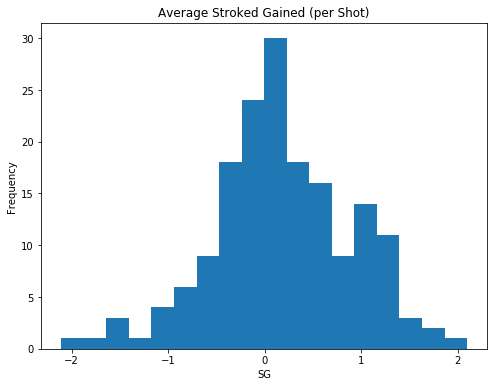

In [0]:

plt.figure(figsize = (8,6))
plt.hist(StrokesGained["AVERAGE"], bins = 18)

plt.xlabel("SG")
plt.ylabel("Frequency")
plt.title("Average Stroked Gained (per Shot)")
#plt.legend(loc = "upper right")

In [0]:
SP2 = playerStats[['GREEN_PCT_SCRAMBLE_SAND','GREEN_PCT_SCRAMBLE_ROUGH', 'PlayerID']]

SP1 = SP2.merge(StrokesGained, how = "inner", on = "PlayerID")

SP1 = SP1.sort_values("TOTAL SG:T")
SP1["Inv_RankTee"] = [x for x in range(len(SP1["PlayerID"]))]
SP1 = SP1.sort_values("TOTAL SG:T2G")
SP1["Inv_RankFairway"] = [x for x in range(len(SP1["PlayerID"]))]
SP1 = SP1.sort_values("TOTAL SG:P")
SP1["Inv_RankPutt"] = [x for x in range(len(SP1["PlayerID"]))]
SP1 = SP1.sort_values('GREEN_PCT_SCRAMBLE_SAND')
SP1["Inv_RankSand"] = [x for x in range(len(SP1["PlayerID"]))]
SP1 = SP1.sort_values('GREEN_PCT_SCRAMBLE_ROUGH')
SP1["Inv_RankRough"] = [x for x in range(len(SP1["PlayerID"]))]



In [0]:
def rankedStat(c,name,data):
  data[name] = (data[c]/len(data[c]))*100
  return(data)

In [0]:
SP1 = rankedStat("Inv_RankTee","Driving (SG)",SP1)
SP1 = rankedStat("Inv_RankFairway","Fairway (SG)",SP1)
SP1 = rankedStat("Inv_RankPutt","Putting (SG)",SP1)
SP1 = rankedStat("Inv_RankRough","Rough (Green Scramble %)",SP1)
SP1 = rankedStat("Inv_RankSand","Bunker (Green Scramble %)",SP1)

In [0]:
SP3 = SP1[["Driving (SG)","Fairway (SG)","Putting (SG)","Rough (Green Scramble %)","Bunker (Green Scramble %)","PLAYER NAME"]]

In [0]:
from math import pi

In [0]:
SP3

,Driving (SG),Fairway (SG),Putting (SG),Rough (Green Scramble %),Bunker (Green Scramble %),PLAYER NAME
81,19.298246,39.181287,16.959064,0.000000,32.163743,J.J. Spaun
135,45.614035,28.654971,69.590643,0.584795,97.660819,Justin Rose
17,83.040936,84.795322,59.064327,1.169591,11.695906,Brooks Koepka
141,46.783626,49.707602,38.011696,1.754386,95.321637,Danny Willett
113,71.929825,82.456140,24.561404,2.339181,6.432749,Jhonattan Vegas
129,10.526316,17.543860,25.730994,2.923977,90.058480,Scott Harrington
38,28.070175,36.842105,32.163743,3.508772,1.169591,Josh Teater
132,70.175439,76.608187,30.409357,4.093567,19.298246,Emiliano Grillo
112,4.678363,15.789474,14.035088,4.678363,25.146199,Robby Shelton
15,16.959064,29.824561,19.298246,5.263158,18.713450,Jim Herman


In [0]:
values=SP3.loc[17].drop('PLAYER NAME').values.flatten().tolist()
values += values[:1]

values2 =SP3.loc[130].drop('PLAYER NAME').values.flatten().tolist()
values2 += values[:1]

angles = [n / float(5) * 2 * pi for n in range(5)]
angles += angles[:1]

categories = ["Driving","Fairway","Putting","Rough","Bunker"]

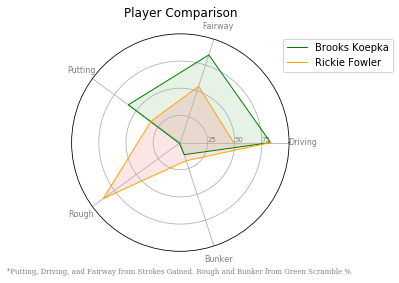

In [0]:
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories , color='grey', size=8)

ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
 

ax.plot(angles, values, linewidth=1, linestyle='solid', label = "Brooks Koepka", color = "Green")
ax.fill(angles, values, 'g', alpha=0.1)

ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Rickie Fowler", color = "Orange")
ax.fill(angles, values2, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

font1 = {'family':'serif','color':'grey','size':7}

plt.title("Player Comparison")
plt.xlabel("*Putting, Driving, and Fairway from Strokes Gained. Rough and Bunker from Green Scramble % ", fontdict = font1)

plt.show()